In [1]:
# import required Libraries.
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

2025-05-03 16:51:20.930664: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/macbook/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# path to images
train_path = "cats-and-dogs/train"
valid_path = "cats-and-dogs/valid"
test_path = "cats-and-dogs/test"

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size =(224,224), classes = ['dog', 'cat'], batch_size = 10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size = 10)
test_batches  = ImageDataGenerator().flow_from_directory(valid_path, target_size = (224,224), classes = ['dog', 'cat'], batch_size =10)

Found 40 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


In [4]:
# define function to plot the images and their labels
def plot(ims, figsize = (12,6), rows = 1, interp = False, titles = None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off') 
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

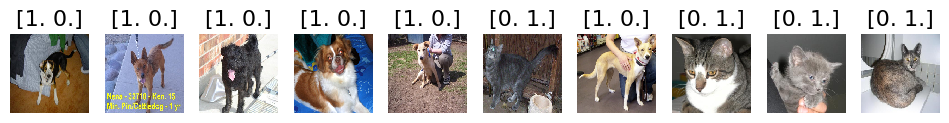

In [6]:
plot(imgs, titles=labels)

In [7]:
# Build and Train a CNN
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
    Flatten(),
    Dense(2, activation = 'softmax'),
])

/Users/macbook/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(train_batches, steps_per_epoch=4, validation_data=valid_batches, validation_steps=4, epochs=6, verbose=2)

/Users/macbook/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
4/4 - 5s - 1s/step - accuracy: 0.5000 - loss: 3289.3137 - val_accuracy: 0.4750 - val_loss: 1099.6439
Epoch 2/6
4/4 - 1s - 292ms/step - accuracy: 0.4000 - loss: 2727.9612 - val_accuracy: 0.5250 - val_loss: 2337.2974
Epoch 3/6
4/4 - 2s - 379ms/step - accuracy: 0.5750 - loss: 1193.1252 - val_accuracy: 0.5000 - val_loss: 2218.7202
Epoch 4/6
4/4 - 1s - 344ms/step - accuracy: 0.5000 - loss: 2237.2808 - val_accuracy: 0.5500 - val_loss: 467.3048
Epoch 5/6
4/4 - 2s - 556ms/step - accuracy: 0.5500 - loss: 1383.7576 - val_accuracy: 0.5000 - val_loss: 1695.7773
Epoch 6/6
4/4 - 2s - 452ms/step - accuracy: 0.6250 - loss: 815.0712 - val_accuracy: 0.5250 - val_loss: 1158.3011
